In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models 
from keras.layers import Dropout
import cv2 as cv
import keras
from pathlib import Path
from sklearn.metrics import confusion_matrix
import seaborn as sns
import sklearn
import os

# Dataset

In [22]:
path ="C:/Users/aleja/Downloads/archive (2)/cell_images/cell_images/"

In [23]:
labels = ['Parasitized', 'Uninfected']
img_size = 150 

def get_training_data(data_dir):
    data =[]
    
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_grey = cv.imread(os.path.join(path, img), cv.IMREAD_GRAYSCALE)
                img_resized= cv.resize(img_grey, (img_size, img_size))
                data.append([img_resized, class_num])
            except Exception as e:
                print(e)
    return np.array(data, dtype=object)

In [24]:
data= get_training_data(path)

OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



In [25]:
print(type(data[0][0]))
print(type(data[-1][0]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


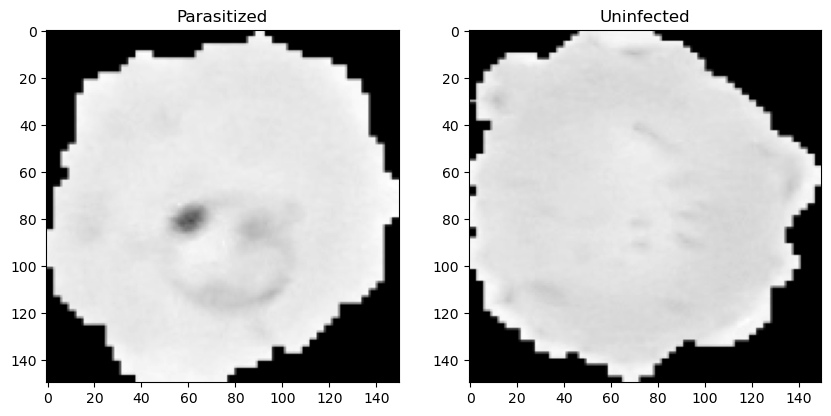

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(data[0][0], cmap='gray')
ax[0].set_title(labels[data[0][1]])

ax[1].imshow(data[-1][0], cmap='gray')
ax[1].set_title(labels[data[-1][1]])

plt.show()

# I shuffle the dataset

In [27]:
np.random.shuffle(data)

# I prepare the dataset by dividing the data into 80% for training, 20% for testing. Then I divide the training data into 80% for training and 20% for validation.

In [28]:
from sklearn.model_selection import train_test_split

# Obtener X e y desde data
X = []
y = []

for i, label in data:
    X.append(i)
    y.append(label)
# Dividimos los datos en entrenamiento (80%) y prueba (20%)

X_train_full, x_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, x_val, y_train, y_val = train_test_split(X_train_full, y_train_full, random_state=42)

In [29]:
X_train = np.array(X_train) /255.0
x_val = np.array(x_val) /255.0
x_test = np.array(x_test) /255.0 
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test= np.array(y_test)

In [30]:
X_train.shape

(16534, 150, 150)

# Preparing the model

In [31]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3,3), activation="relu", input_shape=(150,150,1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2))) 

model.add(layers.Conv2D(16, (3,3), activation="relu")) #
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(32,activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

c:\Users\aleja\miniconda3\envs\deep_learning2\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4624)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │       148,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157,457 (615.07 KB)

 Trainable params: 157,457 (615.07 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [33]:
# keras.utils.plot_model(model, "Model_malaria.png", show_shapes=True)

In [34]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
epochs= 50
history = model.fit(X_train, y_train, epochs=epochs,callbacks=[early_stopping_cb],
                    validation_data=(x_val, y_val))

Epoch 1/50
517/517 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.5487 - loss: 0.6812 - val_accuracy: 0.7085 - val_loss: 0.5530
Epoch 2/50
517/517 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.7456 - loss: 0.5019 - val_accuracy: 0.9278 - val_loss: 0.2249
Epoch 3/50
517/517 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - accuracy: 0.9284 - loss: 0.2096 - val_accuracy: 0.9309 - val_loss: 0.1896
Epoch 4/50
517/517 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - accuracy: 0.9404 - loss: 0.1629 - val_accuracy: 0.9370 - val_loss: 0.1697
Epoch 5/50
517/517 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9485 - loss: 0.1412 - val_accuracy: 0.9436 - val_loss: 0.1574
Epoch 6/50
517/517 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9585 - loss: 0.1221 - val_accuracy: 0.9438 - val_loss: 0.1634
Epoch 7/50
517/517 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9609 - loss: 0.1079 - val_accuracy: 0.9390 - val_loss: 0.1662
Epoch 8/50
517/517 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9646 - loss: 0.0956 - 

# Generate a graph with the model data

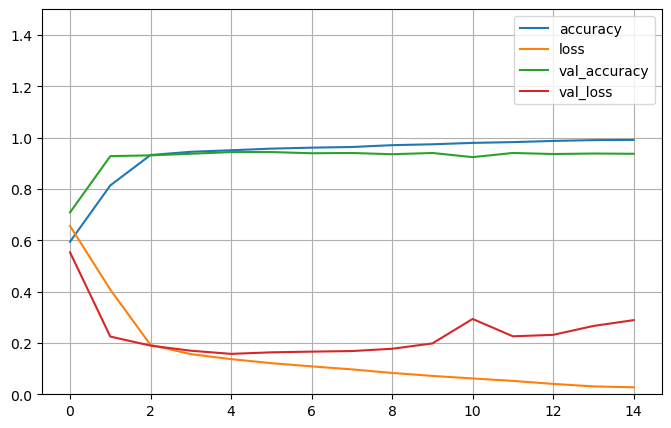

In [35]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)
plt.show()

# Evaluate the model with the training data

In [36]:
model.evaluate(x_test, y_test)

173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9480 - loss: 0.1511


[0.1580970287322998, 0.9473875164985657]

In [37]:
y_test_pred = model.predict(x_test)
y_test_pred_labels = y_test_pred > 0.5 
y_test_true_labels = y_test

173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step


# Confusion matrix

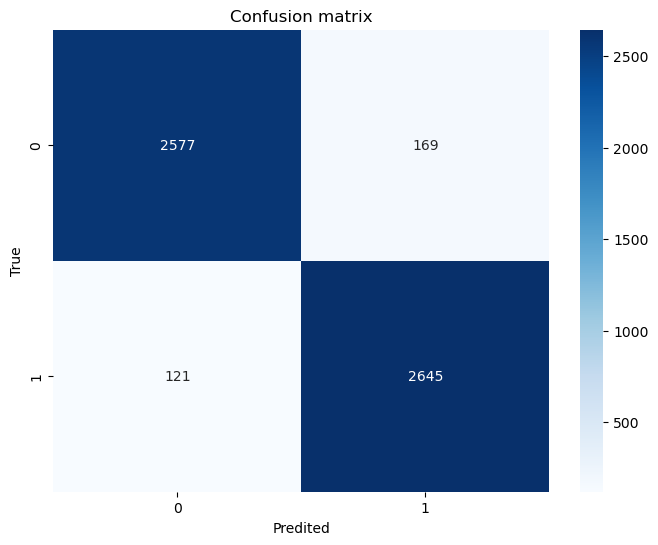

In [38]:
cm = confusion_matrix(y_test_true_labels, y_test_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel('True')
plt.xlabel('Predited')
plt.title('Confusion matrix')
plt.show()

# Classification_report

In [39]:
from sklearn.metrics import classification_report

report = classification_report(y_test_true_labels, y_test_pred_labels, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.9552    0.9385    0.9467      2746
           1     0.9399    0.9563    0.9480      2766

    accuracy                         0.9474      5512
   macro avg     0.9475    0.9474    0.9474      5512
weighted avg     0.9475    0.9474    0.9474      5512



# Graphically represent the predictions made with the test data.

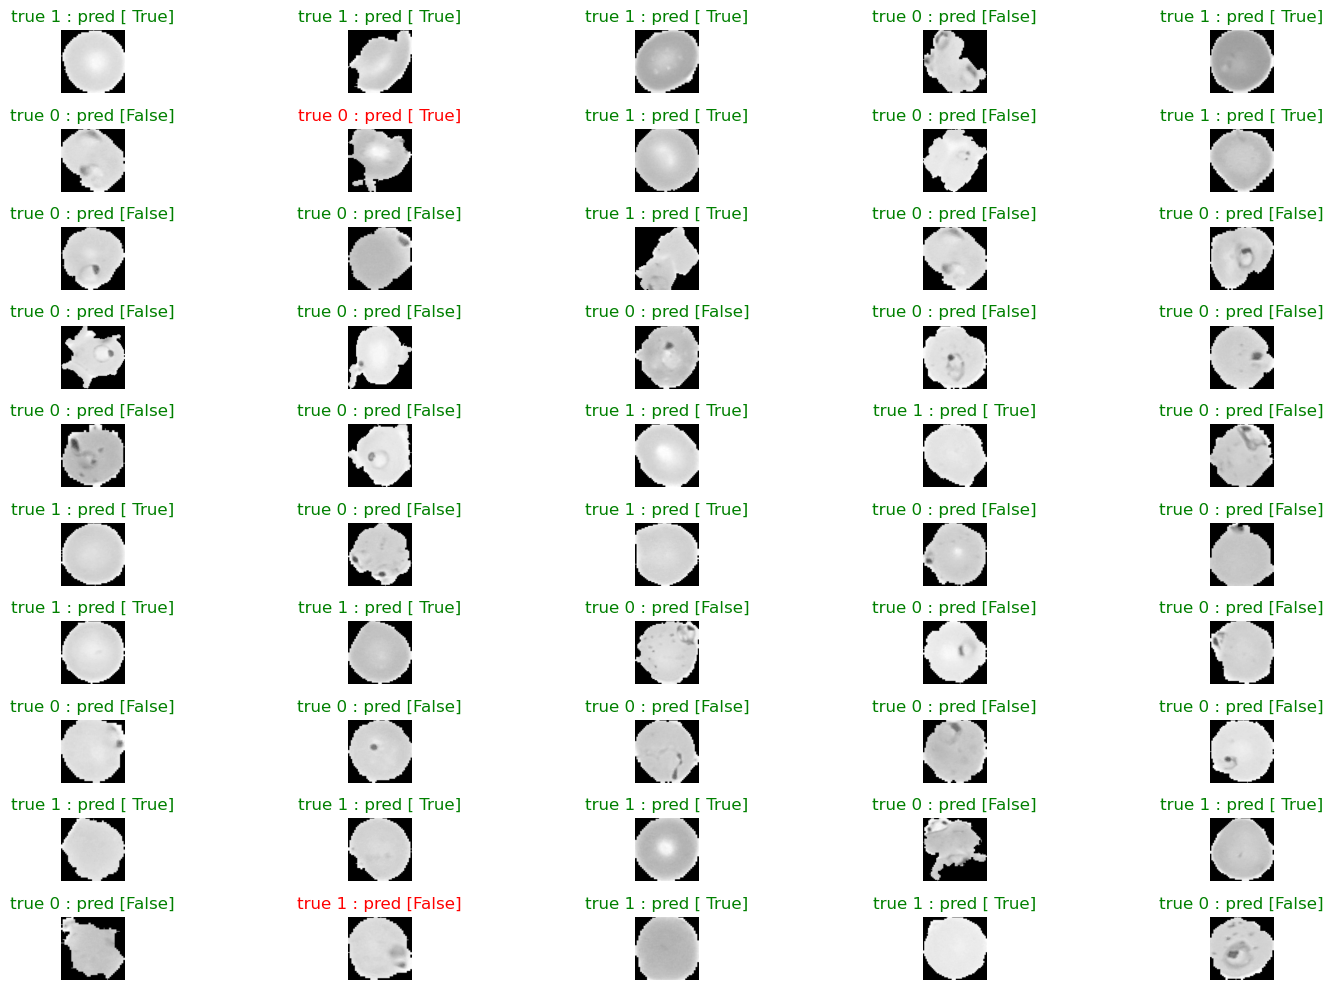

In [40]:
fig, axs = plt.subplots(10, 5, figsize=(16, 10))
axs = axs.flatten()

for ax in axs:
    r = np.random.randint(0, x_test.shape[0])
    true_label = y_test_true_labels[r]
    pred_label = y_test_pred_labels[r]
    title_color = 'green' if true_label == pred_label else 'red'
    ax.imshow(x_test[r], cmap="gray")
    ax.set_title('true {} : pred {}'.format(true_label, pred_label), color=title_color)
    ax.axis('off')

plt.tight_layout()
plt.show()